<h1><i>Package fanalysis</i></h1>
<h2>Analyse en Composantes Principales</h2>
<p>
Ce tutoriel a pour objectif de présenter rapidement les principales fonctionnalités offertes par le package <i>fanalysis</i> pour réaliser une Analyse en Composantes Principales.<br />
Il suppose connu les soubassements théoriques de cette méthode.<br />
Il ne s'attarde pas non plus sur l'interprétation du jeu de données, qui n'a pour but que de présenter les fonctionnalités du package.<br />
2 approches sont présentées :
<ul>
    <li>Une approche "datamining" : l'ACP vise à décrire un jeu de données</li>
    <li>Une approche "machine learning" : l'ACP est utilisée comme méthode de réduction des données, le résultat servant d'entrée pour un modèle prédictif (nous ferons ici l'usage d'outils de scikit-learn).</li>
</ul>
</p>



<h1>I. Approche Datamining</h1>
<p>
L'ACP a ici pour but de décrire un fichier de données.<br />
Celui-ci est extrait du site de Ricco Rakotomalala (Université Lyon 2) :<br />
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/autos_acp.xls<br />
</p>
<p>
Nous partons d'un fichier texte intitulé "pca_data.txt".<br />
On importe la librairie pandas pour charger les données, ainsi que la classe PCA du package <i>fanalysis</i>.<br />
Les données sont transformées en matrice de type numpy.ndarray.
</p>
<p>
Les données doivent se présenter sous la forme d'une matrice de valeurs numériques.
</p>

In [13]:
import pandas as pd
from fanalysis.pcabis import PCA
%matplotlib inline

In [14]:
df = pd.read_table("fanalysis/tests/pca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [15]:
print(df)

                  CYL  PUISS  LONG  LARG  POIDS  V-MAX FINITION   PRIX
Modele                                                                
Alfasud-TI       1350     79   393   161    870    165        B  30570
Audi-100         1588     85   468   177   1110    160       TB  39990
Simca-1300       1294     68   424   168   1050    152        M  29600
Citroen-GS-Club  1222     59   412   161    930    151        M  28250
Fiat-132         1585     98   439   164   1105    165        B  34900
Lancia-Beta      1297     82   429   169   1080    160       TB  35480
Peugeot-504      1796     79   449   169   1160    154        B  32300
Renault-16-TL    1565     55   424   163   1010    140        B  32000
Renault-30       2664    128   452   173   1320    180       TB  47700
Toyota-Corolla   1166     55   399   157    815    140        M  26540
Alfetta-1.66     1570    109   428   162   1060    175       TB  42395
Princess-1800    1798     82   445   172   1160    158        B  33990
Datsun

L'analyse va porter sur les 6 premières variables.

In [16]:

m = df.drop(['FINITION'], axis=1)
#les variables qualitatives ne sont pas encore implémenté
m

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX
Modele,,,,,,,
Alfasud-TI,1350,79,393,161,870,165,30570
Audi-100,1588,85,468,177,1110,160,39990
Simca-1300,1294,68,424,168,1050,152,29600
Citroen-GS-Club,1222,59,412,161,930,151,28250
Fiat-132,1585,98,439,164,1105,165,34900
Lancia-Beta,1297,82,429,169,1080,160,35480
Peugeot-504,1796,79,449,169,1160,154,32300
Renault-16-TL,1565,55,424,163,1010,140,32000
Renault-30,2664,128,452,173,1320,180,47700


<p>On crée une instance de la classe PCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.</p>
<p>Le constructeur de la classe PCA possède un paramètre <i>sdt_unit</i> qui indique si l'ACP est réalisée :
<ul>
    <li>à partir de données centrées et réduites -> PCA(std_unit=True)</li>
    <li>à partir de données centrées mais non réduites -> PCA(std_unit=False)</li>
</ul>
</p>
<p>Par défaut, la valeur du paramètre <i>std_unit</i> est fixée à True, car c'est le cas le plus courant.</p>

In [17]:
my_pca = PCA(std_unit=True, n_components=3)

On estime le modèle en appliquant la méthode <i>fit</i> de la classe PCA sur le jeu de données.

In [18]:
qsup = [7]
isup = [17,18]

#,quanti_sup=qsup, ind_sup=isup
my_pca.fit(m,quanti_sup=qsup, ind_sup=isup)

PCA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX'], dtype='object'),
    n_components=3,
    row_labels=Index(['Alfasud-TI', 'Audi-100', 'Simca-1300', 'Citroen-GS-Club', 'Fiat-132',
       'Lancia-Beta', 'Peugeot-504', 'Renault-16-TL', 'Renault-30',
       'Toyota-Corolla', 'Alfetta-1.66', 'Princess-1800', 'Datsun-200L',
       'Taunus-2000', 'Rancho', 'Mazda-9295'],
      dtype='object', name='Modele'))

In [19]:
my_pca.summary()

,Comp 1,Comp 2,Comp 3
Eigenvalue,4.251,1.025,0.366
Percentage of variance (%),70.844,17.078,6.107
Cumulative percentage of variance (%),70.844,87.922,94.029


,Comp 1,Comp 2,Comp 3
Modele,,,
Alfasud-TI,-2.198,-1.829,-0.525
Audi-100,1.565,1.564,-1.380
Simca-1300,-1.152,0.686,-0.488
Citroen-GS-Club,-2.618,-0.098,-0.018
Fiat-132,0.405,-0.712,0.151
Lancia-Beta,-0.332,0.182,-0.786
Peugeot-504,0.671,0.955,0.261
Renault-16-TL,-1.984,1.047,0.794
Renault-30,4.401,-1.145,0.383


,Comp 1,Comp 2,Comp 3
Modele,,,
Opel-Rekord,2.287,-0.131,-0.847
Lada-1300,-2.763,0.212,0.654


,Comp 1,Comp 2,Comp 3
CYL,0.882,-0.125,0.256
PUISS,0.881,-0.406,0.071
LONG,0.865,0.425,0.002
LARG,0.783,0.445,-0.398
POIDS,0.919,0.221,0.240
V-MAX,0.699,-0.646,-0.284


,Comp 1,Comp 2,Comp 3
PRIX,0.799,-0.095,0.099


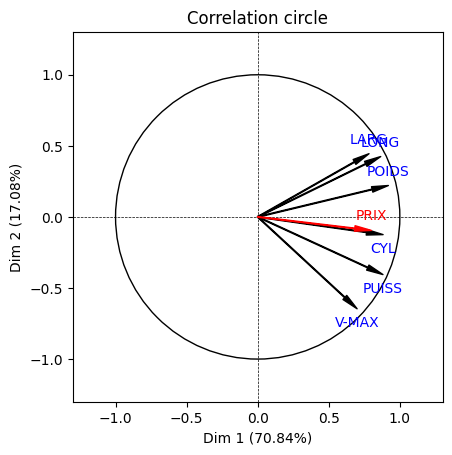

In [20]:
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2)

<p>
L'exécution de la méthode <i>my_pca.fit(X)</i> provoque a minima le calcul des attributs :
<ul>
    <li><i>my\_pca.eig\_</i> : valeurs propres</li>
    <li><i>my\_pca.row\_coord\_</i> : coordonnées des points lignes</li>
    <li><i>my\_pca.col\_coord\_</i> : coordonnées des points colonnes</li>
</ul>

<h3>I.1. Analyse des valeurs propres</h3>

L'attribut <i>my\_pca.eig\_</i> contient :
<ul>
    <li>en 1ère ligne : les valeurs propres en valeur absolue</li>
    <li>en 2ème ligne : les valeurs propres en pourcentage de la variance totale</li>
    <li>en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale</li>

</ul>

In [21]:
my_pca.show_eig()

,Comp 1,Comp 2,Comp 3
Eigenvalue,4.250613,1.024685,0.366423
Percentage of variance (%),70.843550,17.078087,6.107049
Cumulative percentage of variance (%),70.843550,87.921636,94.028686


In [22]:
my_pca.show_eigen_vectors()

,Comp 1,Comp 2,Comp 3
CYL,0.427881,-0.122995,0.422137
PUISS,0.427357,-0.400592,0.116584
LONG,0.419755,0.419606,0.003966
LARG,0.379810,0.439414,-0.657096
POIDS,0.445883,0.218272,0.395756
V-MAX,0.339150,-0.638437,-0.468823


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

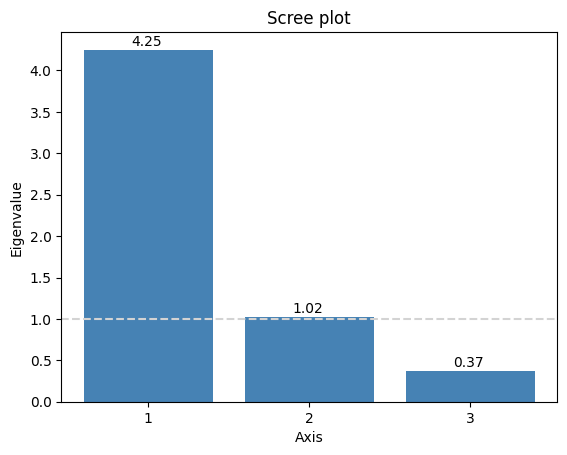

In [23]:
my_pca.plot_eigenvalues()

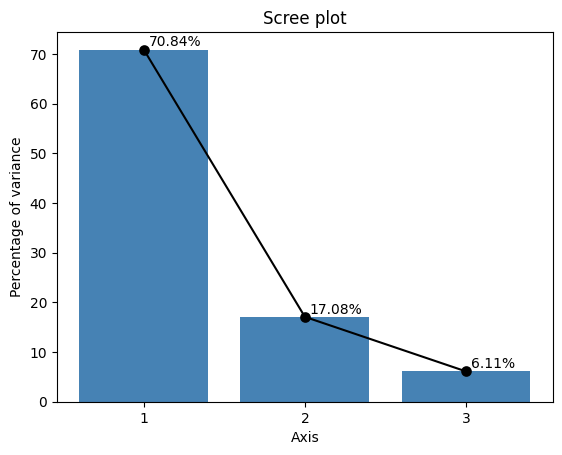

In [24]:
my_pca.plot_eigenvalues(type="percentage")

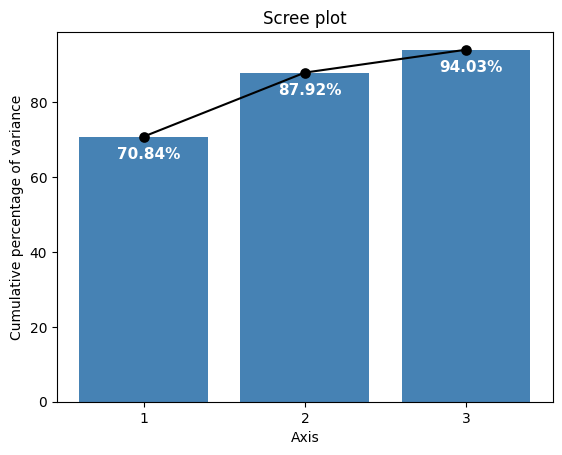

In [25]:
my_pca.plot_eigenvalues(type="cumulative")
#9

<p>Quand l'objet <i>my\_pca</i> a été instancié, son paramètre <i>stats</i> a reçu la valeur True par défaut.<br />
En conséquence, lors de l'exécution de la méthode <i>my\_pca.fit(X)</i>, les statistiques suivantes ont été calculées :
<ul>
    <li><i>my\_pca.row\_contrib\_</i> : contributions des points lignes à la variance de l'axe</li>
    <li><i>my\_pca.col\_contrib\_</i> : contributions des points colonnes à la variance de l'axe</li>
    <li><i>my\_pca.row\_cos2\_</i> : cosinus carrés des points lignes</li>
    <li><i>my\_pca.col\_cos2\_</i> : cosinus carrés des points colonnes</li>
</ul>
</p>
<p>
Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il  aurait fallu instancier :<br />
my\_pca = PCA(stats=False)
</p>
<p>
Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.<br />
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre <i>n_components</i> avec par exemple :<br />
my\_pca = PCA(n_components=3)
</p>


<h3>I.2. Extraction des statistiques sur les points lignes</h3>

<h5>Export de la totalité des données lignes vers une DataFrame pandas</h5>
<p>On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>lignes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

<h5>Statistiques pour les points lignes</h5>

In [26]:
my_pca.show_row(my_pca.row_coord_)

,Comp 1,Comp 2,Comp 3
Modele,,,
Alfasud-TI,-2.198260,-1.828550,-0.525496
Audi-100,1.565361,1.563839,-1.380404
Simca-1300,-1.151926,0.686298,-0.488171
Citroen-GS-Club,-2.618023,-0.098094,-0.017852
Fiat-132,0.404623,-0.711832,0.151085
Lancia-Beta,-0.332497,0.182452,-0.786102
Peugeot-504,0.670977,0.955461,0.261334
Renault-16-TL,-1.984114,1.047116,0.794100
Renault-30,4.401076,-1.145112,0.383380


In [27]:
# Contributions des points lignes
my_pca.show_row(my_pca.row_contrib_)

,Comp 1,Comp 2,Comp 3
Modele,,,
Alfasud-TI,7.105370,20.394049,4.710166
Audi-100,3.602945,14.916738,32.501955
Simca-1300,1.951090,2.872865,4.064825
Citroen-GS-Club,10.078026,0.058692,0.005436
Fiat-132,0.240729,3.090616,0.389350
Lancia-Beta,0.162556,0.203043,10.540346
Peugeot-504,0.661978,5.568212,1.164901
Renault-16-TL,5.788442,6.687733,10.755936
Renault-30,28.480404,7.998081,2.507007


In [28]:
my_pca.show_row(my_pca.row_cos2_)

,Comp 1,Comp 2,Comp 3
Modele,,,
Alfasud-TI,0.561756,0.388690,0.032102
Audi-100,0.347193,0.346518,0.269994
Simca-1300,0.593752,0.210757,0.106635
Citroen-GS-Club,0.987763,0.001387,0.000046
Fiat-132,0.141897,0.439167,0.019784
Lancia-Beta,0.096561,0.029075,0.539737
Peugeot-504,0.295364,0.598920,0.044806
Renault-16-TL,0.653951,0.182138,0.104752
Renault-30,0.893602,0.060495,0.006781


<h3>I.3. Extraction des statistiques sur les points colonnes</h3>

<h5>Export de la totalité des données colonnes vers une DataFrame pandas</h5>
<p>On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>colonnes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [29]:
my_pca.show_col(my_pca.col_coord_)

,Comp 1,Comp 2,Comp 3
CYL,0.882163,-0.124504,0.255532
PUISS,0.881082,-0.405506,0.070572
LONG,0.865410,0.424753,0.002401
LARG,0.783054,0.444804,-0.397759
POIDS,0.919277,0.220949,0.239562
V-MAX,0.699226,-0.646269,-0.283792


In [32]:
my_pca.show_col(my_pca.col_contrib_)

,Comp 1,Comp 2,Comp 3
CYL,18.308235,1.512788,17.819939
PUISS,18.263380,16.047391,1.359186
LONG,17.619442,17.606904,0.001573
LARG,14.425546,19.308464,43.177516
POIDS,19.881139,4.764249,15.662251
V-MAX,11.502259,40.760204,21.979534


In [31]:
# Cos2 des points colonnes
my_pca.show_col(my_pca.col_cos2_)

,Comp 1,Comp 2,Comp 3
CYL,0.778212,0.015501,0.065296
PUISS,0.776306,0.164435,0.004980
LONG,0.748934,0.180415,0.000006
LARG,0.613174,0.197851,0.158212
POIDS,0.845070,0.048819,0.057390
V-MAX,0.488916,0.417664,0.080538


<h3>I.4. Graphiques</h3>

<p>
3 types de graphiques peuvent être réalisés :
<ul>
    <li>Le cercle des corrélations</li>
    <li>Le mapping des point lignes</li>
    <li>Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe</li>
</ul>
</p>
<h5>Graphiques factoriels</h5>

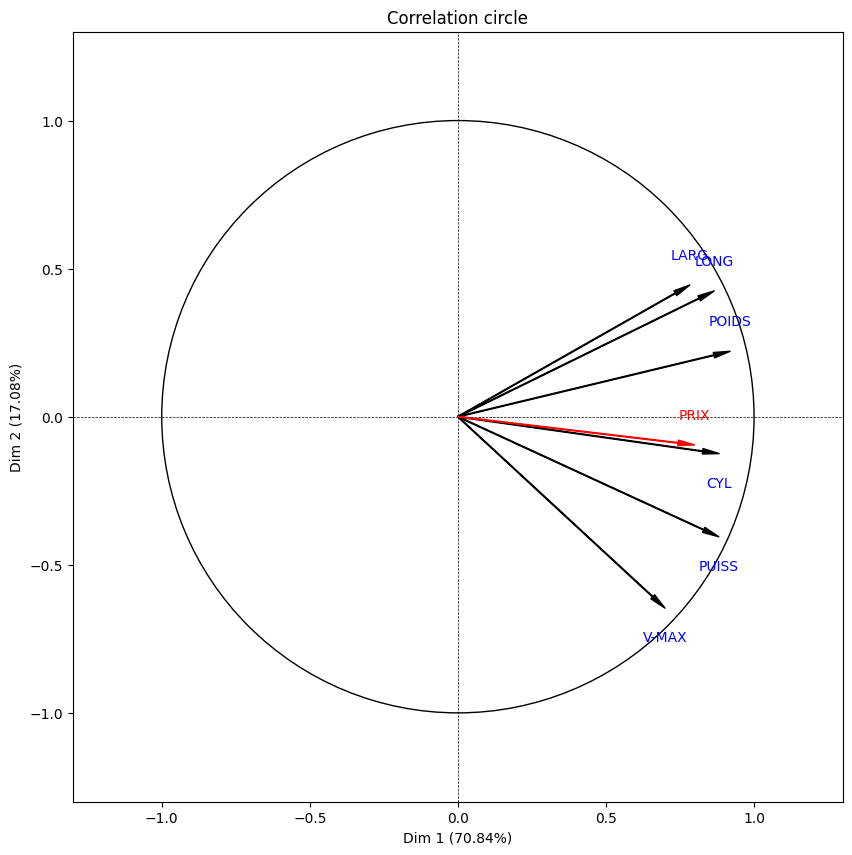

In [33]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_pca.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(10,10))

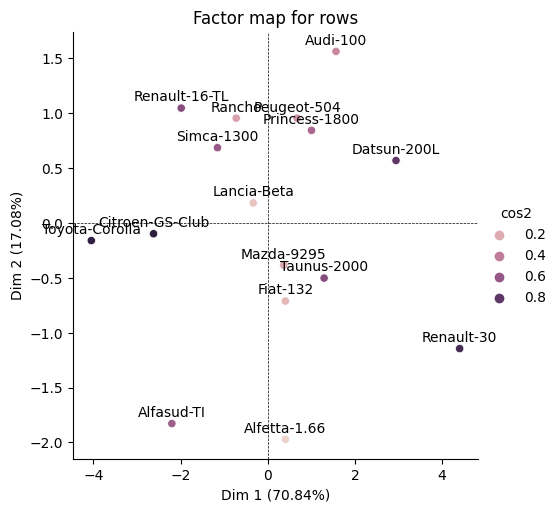

In [34]:
## test de représentation en fonction du cos2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

num_x_axis = 1
num_y_axis = 2

x=my_pca.row_coord_[:, num_x_axis - 1]
y=my_pca.row_coord_[:, num_y_axis - 1]
cos2=my_pca.row_cos2_[:, num_x_axis - 1]

df=pd.DataFrame({'x':x,'y':y,'cos2':cos2})


sns.relplot(x='x',y='y',hue='cos2',data=df) 


#plt.figure(figsize=(6,6)), plt.scatter(my_pca.row_coord_[:, num_x_axis - 1], my_pca.row_coord_[:, num_y_axis - 1], marker=".", color="white")
for i in np.arange(0, my_pca.row_coord_.shape[0]):
    plt.text(my_pca.row_coord_[i, num_x_axis - 1], my_pca.row_coord_[i, num_y_axis - 1] + 0.1, my_pca.row_labels_[i], horizontalalignment="center", verticalalignment="center", color="black")
plt.title("Factor map for rows")
plt.xlabel("Dim " + str(num_x_axis) + " (" + str(np.around(my_pca.eig_[1, num_x_axis - 1], 2)) + "%)")
plt.ylabel("Dim " + str(num_y_axis) + " (" + str(np.around(my_pca.eig_[1, num_y_axis - 1], 2)) + "%)")
plt.axvline(x=0, linestyle="--", linewidth=0.5, color="k")
plt.axhline(y=0, linestyle="--", linewidth=0.5, color="k")
plt.show()

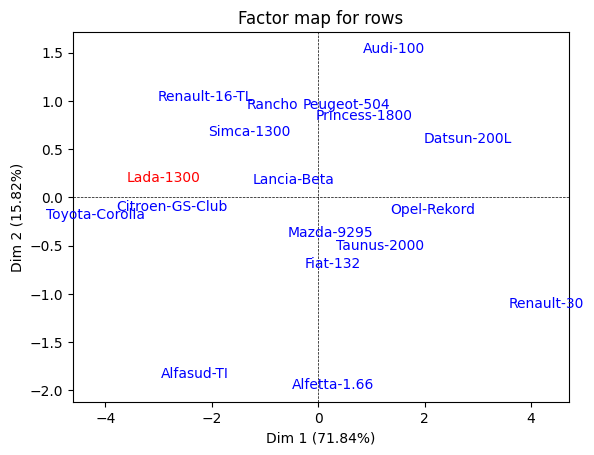

In [10]:
# Mapping des points lignes
my_pca.mapping_row(num_x_axis=1, num_y_axis=2)

<h5>Analyse du 1er axe - Points lignes</h5>

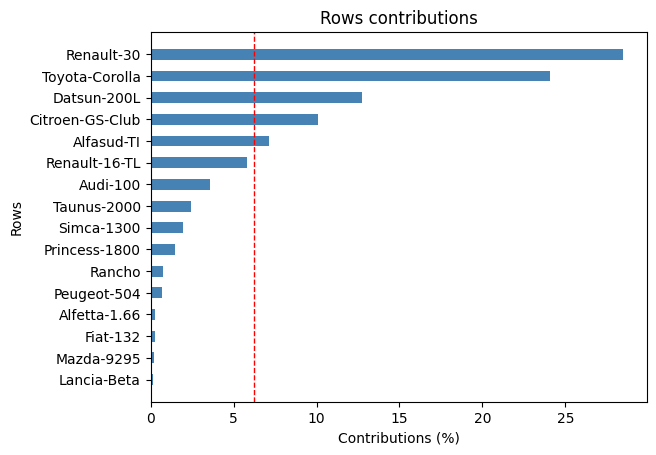

In [35]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_pca.plot_row_contrib(num_axis=1)

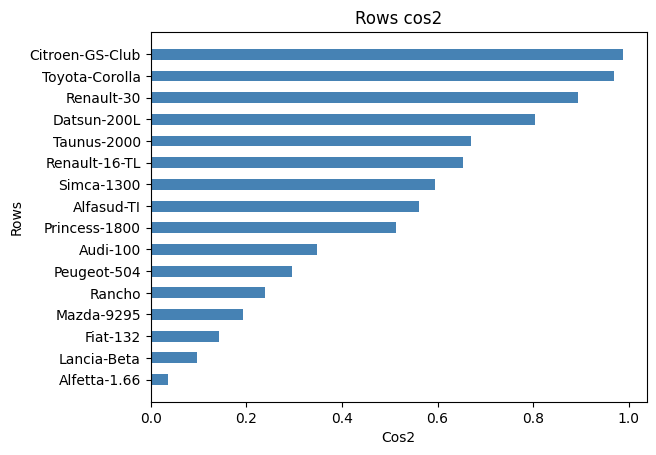

In [36]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_pca.plot_row_cos2(num_axis=1)

<h5>Analyse du 1er axe - Points colonnes</h5>

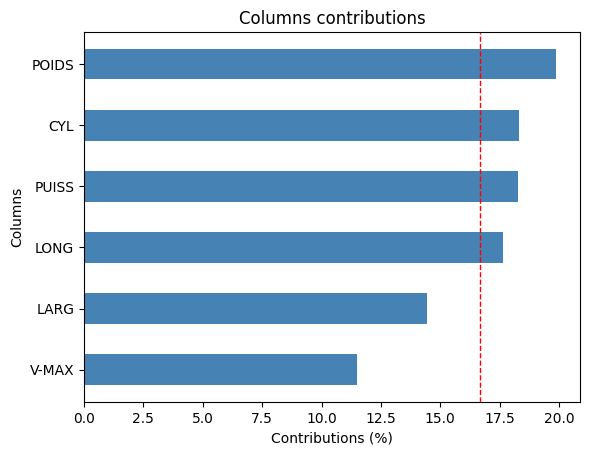

In [37]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_pca.plot_col_contrib(num_axis=1)

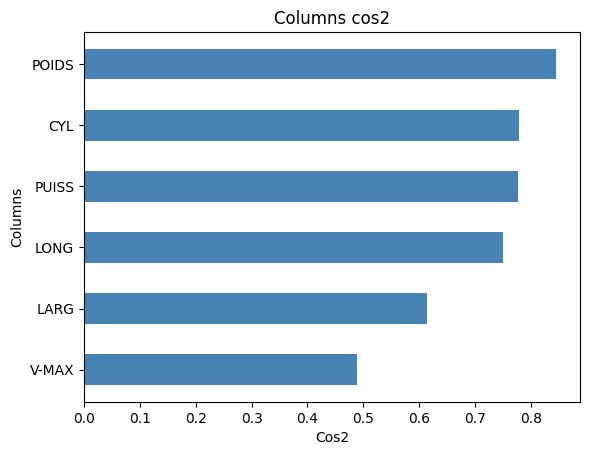

In [38]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_pca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes <i>plot_row_contrib</i>, <i>plot_row_cos2</i>, <i>plot_col_contrib</i>, <i>plot_col_cos2</i>, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

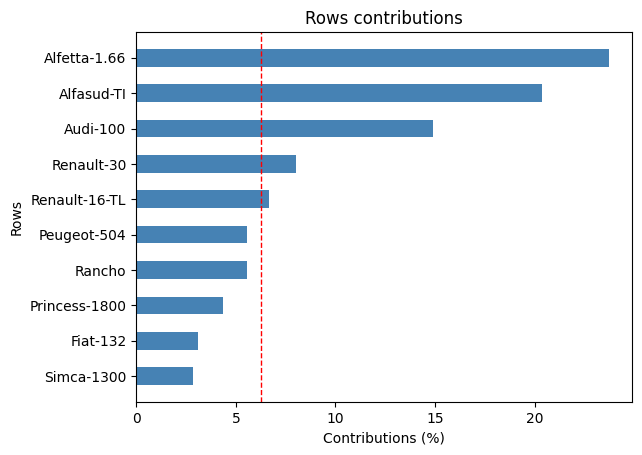

In [42]:
my_pca.plot_row_contrib(num_axis=2, nb_values=10)

Pour tous les graphiques présentés plus haut, il est possible de définir un taille particulière via le paramètre <i>figsize</i>.

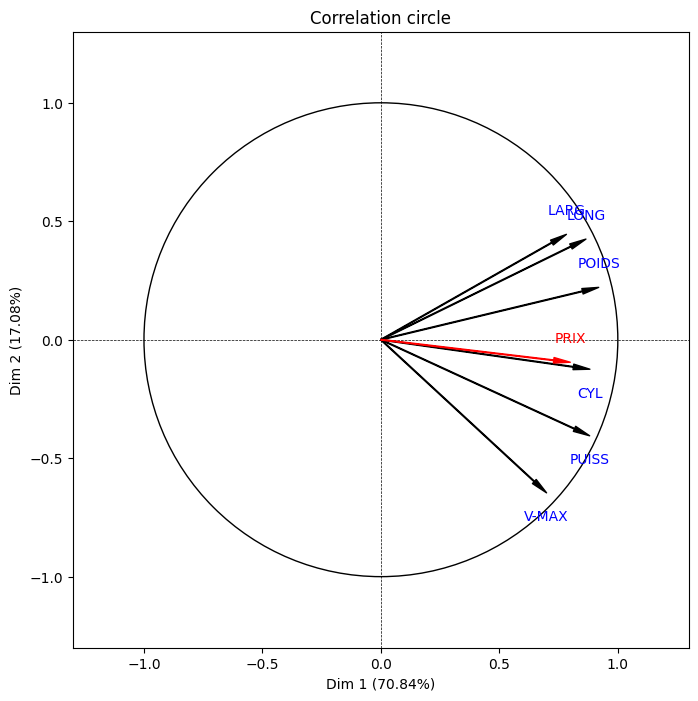

In [43]:
my_pca.correlation_circle(1, 2, figsize=(10, 8))

<h1>II. Approche Machine Learning</h1>
<p>
Ici, l'objectif est d'utiliser l'Analyse en Composantes Principales en tant que méthode de prétraitement.
</p>
<p>
La classe PCA implémente les méthodes <i>fit</i>, <i>transform</i> et <i>fit_transform</i> bien connues des utilisateurs de scikit-learn.
</p>
<p>
Il est ici judicieux de fixer le paramètre <i>stats</i> à <i>False</i> pour gagner en temps de traitement et en ressources mémoire.
</p>

In [29]:
my_pca = PCA(stats=False)

In [30]:
my_pca.fit(X)

PCA(col_labels=None, n_components=None, row_labels=None, stats=False,
  std_unit=True)

In [31]:
my_pca.transform(X)

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696,
        -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,
         0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398,
        -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322,
        -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,
         0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594,
        -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165,
        -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513,
        -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967,
        -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,
         0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.

In [32]:
my_pca.fit_transform(X)

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696,
        -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,
         0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398,
        -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322,
        -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,
         0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594,
        -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165,
        -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513,
        -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967,
        -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,
         0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.

<h5>Intégration dans une Pipeline de scikit-learn</h5>

La class PCA peut être intégrée dans une Pipeline de scikit-learn.<br />
Dans le cadre de notre exemple, nous cherchons à prédire la 8ème variable (variable <i>PRIX</i>) à partir des 6 premières variables du jeu de données.<br />
<i>PRIX</i> est une variable quantitative.<br />
Pour la prédire, nous allons utiliser un modèle de régression linéaire multiple, qui prendra en input des axes issus d'une Analyse en Composantes Principales pratiquée sur les données brutes.<br />
Dans un premier temps, et de façon tout à fait arbitraire, nous fixons le nombre de composantes extraites à 4. 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

In [34]:
df = pd.read_table("pca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [35]:
# X = features
X = df.iloc[:, 0:6].as_matrix()
# y = labels
y = df.iloc[:, 7].as_matrix()

In [36]:
# Construction de la Pipeline
# On enchaine une Analyse en Composantes Prnicipales (4 axes retenus) puis une régression linéaire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

In [37]:
# Estimation du modèle
pipe.fit(X, y)

Pipeline(steps=[('pca', PCA(col_labels=None, n_components=4, row_labels=None, stats=False,
  std_unit=True)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [38]:
# Prédiction sur l'échantillon de test
print(pipe.predict(X))

[ 28778.47166651  35726.0600918   31011.95297996  28033.41003637
  37806.88571481  34114.82070564  34931.02152346  27901.90893024
  43330.89903245  24545.70725329  38661.65482425  34794.41267099
  44874.06372338  35323.75414906  33995.01296845  35061.73868418
  37741.70392817  28221.52111698]


Le paramètre <i>n_components</i> peut faire l'objet d'une optimisation via GridSearchCV de scikit-learn.<br />
Nous reconstruisons donc une Pipeline, sans spécifier de valeur a priori pour <i>n_components</i>.

In [39]:
# Reconstruction d'une Pipeline, sans spécifier de valeur a priori pour n_components
pipe2 = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [40]:
# Paramétrage de la grille de paramètres
# Attention à l'étendue des valeurs possibles pour mca__n_components !!!
param = [{"pca__n_components": [x + 1 for x in range(6)]}]

In [41]:
# Construction de l'obet GridSearchCV
grid_search = GridSearchCV(pipe2, param_grid=param, scoring="neg_mean_squared_error")

In [42]:
# Estimation du modèle
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(col_labels=None, n_components=None, row_labels=None, stats=False,
  std_unit=True)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'pca__n_components': [1, 2, 3, 4, 5, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
# Affichage du score optimal
grid_search.best_score_

-18610346.08613852

In [44]:
# Affichage du RMSE optimal
print(np.sqrt(-grid_search.best_score_))

4313.97103446


In [45]:
# Affichage du paramètre optimal
grid_search.best_params_

{'pca__n_components': 1}

In [46]:
# Prédiction sur l'échantillon de test
grid_search.predict(X)

array([ 29139.98988976,  37822.30866848,  31532.16353147,  28119.76302732,
        35162.50072319,  33444.76911431,  35763.33324829,  29586.80401162,
        44505.30484225,  24806.64915211,  35185.50176092,  36547.58683567,
        41059.35689487,  37243.75476268,  32537.03557754,  35063.61150171,
        39531.16366344,  27803.40279437])